To compile the results without querying the model, using the same data I gathered, skip the cell below. To gather your own data by querying the model and outputting to a jsonl file, run the cell below. Note that this takes a long time, as you have to wait for thousands of Replicate queries, and make sure to fill in your API token. Because some topics performed best on $1$-shot, and the rest best on $5$-shot, I evaluate these two groups with separate calls. 

In [2]:
from Dataset import get_acc_n_shot, one_shot_list, five_shot_list

RESULTS_FILE = 'good_results.jsonl'

for topic in one_shot_list:
    get_acc_n_shot("r8_bYj8sqf8lYXoyFsBO1cgEYR7TLLio3B1hVBS3", topic=topic, n=1, output=RESULTS_FILE)
for topic in five_shot_list:
    get_acc_n_shot("YOUR_TOKEN_HERE", topic=topic, n=5, output=RESULTS_FILE)

KeyboardInterrupt: 

Once you have gathered your data from the Llama responses through Replicate and written them to a jsonl file, run the cell below to see the micro accuracy (average of accuracy for every one of the 57 topic) and macro accuracy (average of micro accuracy taken across the 4 categories). The results from running the cell above have already been compiles in 'good_results.jsonl'

Micro Accuracy: 0.6025442936975965
{'STEM Accuracy:': 0.513513901612054, 'humanities Accuracy:': 0.6099268883926363, 'social sciences Accuracy:': 0.6924400457173497, 'other (business, health, misc.) Accuracy:': 0.6331031724309691}
Macro Accuracy: 0.6122460020382523


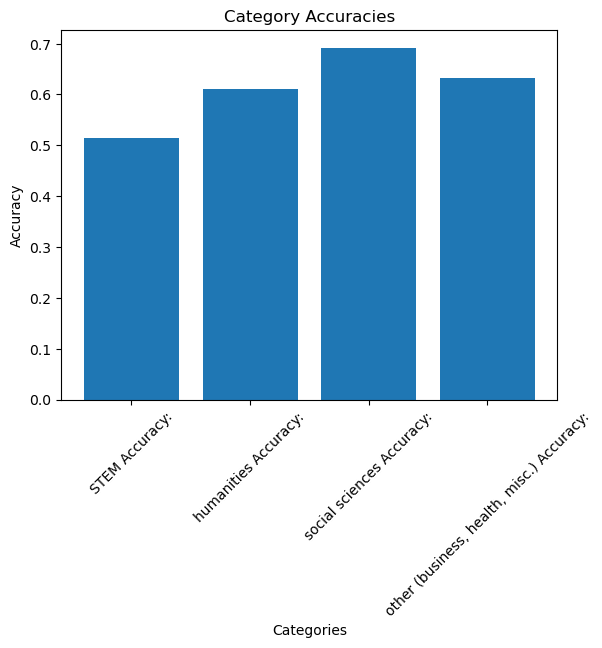

{'abstract_algebra': 0.3465346534653465, 'anatomy': 0.5735294117647058, 'astronomy': 0.6879084967320261, 'business_ethics': 0.5965346534653465, 'clinical_knowledge': 0.6842105263157895, 'college_biology': 0.7241379310344828, 'college_chemistry': 0.43564356435643564, 'college_computer_science': 0.6336633663366337, 'college_mathematics': 0.33663366336633666, 'college_medicine': 0.5316091954022989, 'college_physics': 0.3592233009708738, 'computer_security': 0.7128712871287128, 'conceptual_physics': 0.5084745762711864, 'econometrics': 0.4608695652173913, 'electrical_engineering': 0.5958904109589042, 'elementary_mathematics': 0.42810026385224276, 'formal_logic': 0.4015748031496063, 'global_facts': 0.37623762376237624, 'high_school_biology': 0.7202572347266881, 'high_school_chemistry': 0.4803921568627451, 'high_school_computer_science': 0.6534653465346535, 'high_school_european_history': 0.4292168674698795, 'high_school_geography': 0.7738693467336684, 'high_school_government_and_politics': 0

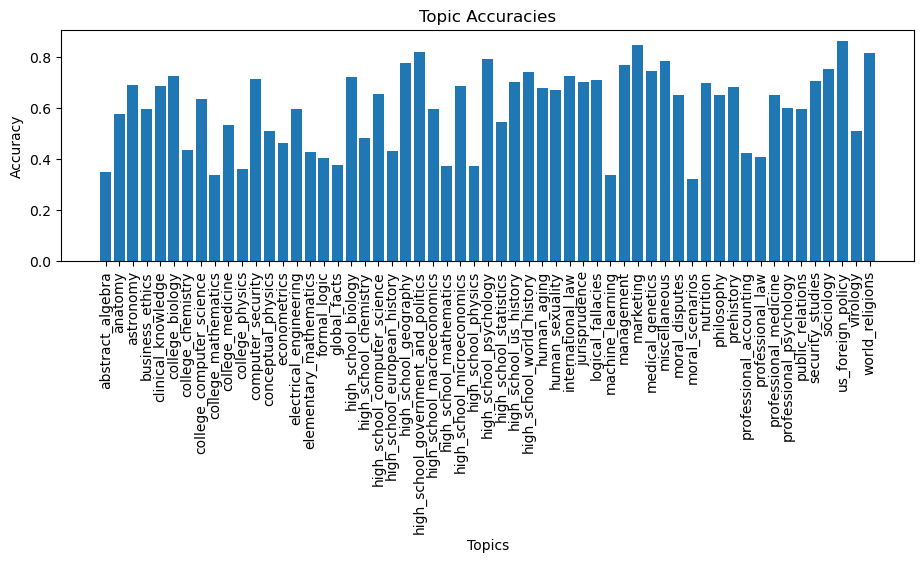

In [5]:
import json
import numpy as np
from categories import subcategories, cat_to_sub, sub_to_cat
import matplotlib.pyplot as plt

RESULTS_FILE = 'good_results.jsonl'

cat_acc_vals = {category: [] for category in cat_to_sub}
topic_accs = {topic: 0 for topic in subcategories}
accs = []

#Open our results file
with open(RESULTS_FILE, 'r') as file:
    for line in file:
        topic_data = json.loads(line)
        #Add the total correct answers and a quarter of the misoutputted responses and divide by total questions for this topic to get accuracy 
        acc = (topic_data['correct']+topic_data['fails']/4)/topic_data['total']
        accs.append(acc)
        topic_accs[topic_data['topic']] = acc

        #Get the subcategories that the topic belongs to (although there should only be one for standard MMLU)
        subs = subcategories[topic_data['topic']]
        for sub in subs: 
            #Get the overall category of the topic (i.e STEM, social sciences)
            category = sub_to_cat[sub]
            cat_acc_vals[category].append(acc)
cat_acc_dict = {f"{category} Accuracy:": sum(cat_acc_vals[category])/len(cat_acc_vals[category]) for category in cat_acc_vals}

print(f"Micro Accuracy: {np.sum(accs)/len(accs)}")
print(cat_acc_dict)
print(f"Macro Accuracy: {sum(cat_acc_dict.values())/4}")

# Extract the categories and accuracies from the dictionary
categories = list(cat_acc_dict.keys())
accuracies = list(cat_acc_dict.values())

# Plot the accuracies
plt.bar(categories, accuracies)
plt.xlabel('Categories')
plt.ylabel('Accuracy')
plt.title('Category Accuracies')
plt.xticks(rotation=45)
plt.show()

print(topic_accs)

topics = list(topic_accs.keys())
accuracies = list(topic_accs.values())

# Plot the accuracies
plt.figure(figsize=(11, 3))
plt.bar(topics, accuracies)
plt.xlabel('Topics')
plt.ylabel('Accuracy')
plt.title('Topic Accuracies')
plt.xticks(rotation=90)
plt.show()